# <b><font color="magenta">Splunk</font> DSDL</b> - Dask Tutorial

<hr style="border:1px solid magenta">

## 1. Introduction to Dask

**Dask** is a flexible parallel computing library for analytics. It provides advanced parallelism for analytics, enabling performance at scale for the tools you love. Dask extends common interfaces like NumPy, Pandas, and scikit-learn to larger-than-memory or distributed environments.

### Why Use Dask?

- **Scalability**: Dask can scale from a single machine to a cluster of machines.
  
- **Parallelism**: Leverages multi-core CPUs for parallel computations.

  
- **Flexibility**: Works with existing Python ecosystems like NumPy, Pandas, and scikit-learn.

  
- **Lazy Evaluation**: Builds computation graphs for efficient execution.

<br>
<hr>

### Dask core principles;

-   **Lazy Computation**:\
    Dask computations are lazy, meaning that operations are not immediately executed. Instead, Dask builds a task graph for deferred execution. You need to explicitly trigger computations by calling `.compute()`. Without this, nothing is actually processed.

-   **Dask Client**:\
    For more control and to monitor distributed tasks, you can use a Dask client (`dask.distributed.Client`). This provides access to a dashboard and facilitates distributed execution across clusters. The client also offers more detailed control over how computations are executed.

-   **Partitioning for Parallelism**:\
    Dask divides data into smaller chunks (partitions) that are processed in parallel. This allows it to handle large datasets that don't fit into memory. However, it's important to balance partition sizes---too small can cause overhead, too large can lead to memory issues.

-   **Dask Arrays, DataFrames, and Bags**:\
    Dask provides parallelized versions of common data structures like NumPy arrays (`dask.array`), Pandas DataFrames (`dask.dataframe`), and Python iterators (`dask.bag`). These enable you to scale familiar data structures for large computations.

-   **Handling Memory and Disk Usage**:\
    Dask can spill to disk when memory is limited, but it's crucial to monitor and manage memory usage. Using the Dask dashboard can help identify bottlenecks or memory issues in computations.

-   **Delayed Execution**:\
    `dask.delayed` allows you to convert normal Python functions into Dask tasks. This is useful when you want to parallelize custom computations or control execution flow.

-   **Scalability**:\
    Dask scales from single-machine, multi-threaded processing to distributed systems with many machines. For distributed systems, Dask works well with clusters like Kubernetes, Yarn, or just a simple multi-node setup.

<br>

---

### Dask Data Structures

Dask provides several parallel data structures:

- **Dask Array**: Parallel NumPy array.
  
- **Dask DataFrame**: Parallel Pandas DataFrame.
  
- **Dask Bag**: Parallel lists for semi-structured or unstructured data.
  
- **Dask Delayed**: Wraps arbitrary Python functions for parallel execution.

 <br> 
 
---


-   **Efficiency Tips**:

    -   Avoid excessive small tasks. Merging small tasks into fewer, larger ones can reduce overhead.
    -   Watch out for task graph size: very large task graphs can slow down the scheduler.
    -   Optimize partition sizes based on available memory.

 
---

2\. Dask Distributed Computing
------------------------------

Dask can distribute computations across multiple machines or cores, allowing you to scale your computations beyond a single machine.

**Why Use Dask Distributed?**

-   **Scalability**:\
    Distribute computations across multiple machines or cores.
    
-   **Resource Management**:\
    Control CPU and memory usage for efficient processing.

    
-   **Monitoring**:\
    Access a dashboard for real-time monitoring and diagnostics.

 <br>

---

### 2.1 Setting Up a Dask Cluster

**Step-by-Step Explanation:**

2.1.1.  **Import the Dask Distributed Client:**

-   **`Client`**: Connects to a Dask cluster and manages computations.

In [1]:
from dask.distributed import Client 

2.1.2.  **Start a Local Cluster:**

-   **`n_workers=4`**: Number of worker processes.
-   **`threads_per_worker=2`**: Number of threads per worker.
-   **`memory_limit='2GB'`**: Memory limit per worker.
-   **`print(client)`**: Outputs the cluster configuration and a link to the Dask dashboard.



In [2]:
# Start a local cluster
client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
print(client)

<Client: 'tcp://127.0.0.1:43257' processes=4 threads=8, memory=7.45 GiB>


2.1.3. **Display the Client Information:**<br>

To monitor your computations, you can easily launch the Dask dashboard after running `client`. Here's how:

1.  Run `client` in notebook cell below.
2.  Click on **"Launch dashboard in JupyterLab"** link to open the Dask dashboard in a new tab in JupyterLab.

In [3]:
# Show client information
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 7.45 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43257,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 7.45 GiB
Comm: tcp://127.0.0.1:39265,Total threads: 2
Dashboard: http://127.0.0.1:41895/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:45765,


####  **What is the Dask Dashboard?**

The Dask dashboard is a real-time visualization tool that provides insights into the current state of your distributed computations. Some of its key benefits include:

-   **Task Progress**: Visualizes the execution of tasks over time.
-   **Resource Monitoring**: Shows CPU, memory, and disk usage of each worker.
-   **Task Stream**: Displays when and how tasks are being processed.

These visualizations help you identify performance bottlenecks and optimize your computations.


####  **Keep the Dashboard Open**

You can keep the dashboard open while you continue working through the notebook. As you execute your computations, the dashboard will update in real-time, allowing you to observe:

-   The status of ongoing tasks.
-   Worker activity, including resource utilization.
-   Any performance bottlenecks that may arise.

By monitoring the dashboard, you'll gain valuable insights into how your distributed system is operating, which can help with debugging and performance optimization.

<br>

<hr>

## 3. Data Import and Export

### 3.1 Reading Data

#### Get a Data Sample from Splunk

There are currently **two ways** to retrieve data from Splunk into the Dask environment:

- **Option 1**: Interactively pull data from Splunk into the Dask environment.
  
- **Option 2**: Push data from Splunk into your notebook environment by staging data.


<hr>

## <b><font color="magenta">Option 1 - Pull Data from Splunk</font></b>

This option is useful when the Splunk REST API is accessible from the Jupyter environment and a valid Splunk auth token is defined.

Here, we import the SplunkSearch utility, dask.dataframe for working with large-scale data, pandas for DataFrame manipulation, and json to load json files.<br>
Dask DataFrames are useful for scaling out data analysis when the dataset is too large to fit in memory. We will begin by working with pandas for its ease and then transition to Dask for scalability.

Pandas is efficient for smaller datasets and allows for easy exploration, while Dask can parallelize operations for larger data.
<hr>


### 3.1.1 Import Necessary Libraries:

-   `dsdlsupport`: A custom module that provides support functions for data science tasks, including the `SplunkSearch` class.
-   `dask.dataframe as dd`: Import Dask's DataFrame module for handling large datasets.
-   `pandas as pd`: Import Pandas for handling data in DataFrame format.

In [9]:
# Import necessary libraries
from dsdlsupport import SplunkSearch
import dask.dataframe as dd
import pandas as pd
import json



### 3.1.2 Define the Splunk SPL Query:

We are using Splunk's makeresults command to generate synthetic data consisting of 100 records.<br>
This data includes attributes such as Name, City, Age, Occupation, and Target. <br>
This makes it easy to generate a repeatable dataset for testing purposes.

- **`makeresults count=100`**: Generates 100 empty events.
- **`eval NameList=...`**: Creates a variable `NameList` containing a comma-separated string of names.
- **`eval CityList=...`**: Creates a variable `CityList` containing a comma-separated string of cities.
- **`eval Name=...`**: Randomly selects a name from `NameList`.
- **`eval City=...`**: Randomly selects a city from `CityList`.
- **`eval Age=...`**: Generates a random age between 18 and 67.
- **`fields Name City Age`**: Keeps only the `Name`, `City`, and `Age` fields in the results.
  
**Field Breakdown:**
- <b>Name, City, Occupation:</b> Randomly selected from pre-defined lists.
- <b>Age:</b> Randomly generated value between 18 and 67.
- <b>Target:</b> Classification based on the Age field, indicating either "Older Adult" or "Young Adult".

In [10]:
# Splunk SPL query
search_query = '''| makeresults count=10
| eval NameList="Eve,Jack,Ian,Charlie,Jack,Bob,Ian,Frank,Bob,Ian,Alice,Mary,John,Emma,Michael"
| eval CityList="Chicago,New York,Los Angeles,Miami,Houston,San Francisco,Boston,Atlanta,Dallas,Seattle"
| eval OccupationList="Engineer,Doctor,Artist,Lawyer,Teacher,Developer,Manager,Analyst,Scientist,Consultant"
| eval Name=mvindex(split(NameList, ","), random() % 15)
| eval City=mvindex(split(CityList, ","), random() % 10)
| eval Occupation=mvindex(split(OccupationList, ","), random() % 10)
| eval Age=round(random() % 50 + 18)
| eval Target=if(Age >= 35, "Older Adult", "Young Adult")
| fields Name City Age Occupation Target
| fit MLTKContainer mode=stage algo=barebone_template Name City Age Occupation Target into app:SoDSDL_dask'''



### 3.1.3 Perform the Search and Retrieve Results as a Pandas DataFrame:

The <b>SplunkSearch</b> method executes the SPL query, and the as_df() method converts the resulting data into a pandas DataFrame for further analysis.

-   **`SplunkSearch`**: Initializes a search operation with the provided SPL query.
-   **`search.as_df()`**: Executes the search and returns the results as a Pandas DataFrame.

In [37]:
# Perform the search and get a Pandas DataFrame
search = SplunkSearch.SplunkSearch(search=search_query)
df = search.as_df()

-   **`SplunkSearch`**: Initializes a search operation with the provided SPL query.
-   **`search.as_df()`**: Executes the search and returns the results as a Pandas DataFrame.


### 3.1.4 Convert the Pandas DataFrame to a Dask DataFrame:


Convert the pandas DataFrame into a Dask DataFrame with 2 partitions.<br>
Partitioning is a way to divide the data for parallel processing, improving efficiency when dealing with larger datasets.

-   **`search.as_df()`**: Loads data from search into Pandas DataFrame
-   **`dd.from_pandas()`**: Converts a Pandas DataFrame into a Dask DataFrame.
-   **`npartitions=2`**: Splits the DataFrame into 2 partitions for parallel processing.

In [38]:
# Convert to a Dask DataFrame
df = search.as_df()
df = dd.from_pandas(df, npartitions=2)

### 3.1.5 Display the Dask DataFrame:

**`df.compute()`**: Triggers the computation and returns the full DataFrame as a Pandas DataFrame. Since Dask DataFrames are lazy, calling `.compute()` executes the computation and retrieves the data.

In [39]:
# Display the DataFrame
df.compute()

,_time,Name,City,Occupation,Age,Target
0,2024-10-16T15:35:54.000+02:00,Ian,Chicago,Scientist,39,Older Adult
1,2024-10-16T15:35:54.000+02:00,John,New York,Doctor,18,Young Adult
2,2024-10-16T15:35:54.000+02:00,Ian,Seattle,Lawyer,27,Young Adult
3,2024-10-16T15:35:54.000+02:00,Michael,Seattle,Engineer,29,Young Adult
4,2024-10-16T15:35:54.000+02:00,Bob,Houston,Consultant,53,Older Adult
5,2024-10-16T15:35:54.000+02:00,Mary,New York,Manager,46,Older Adult
6,2024-10-16T15:35:54.000+02:00,Alice,New York,Scientist,35,Older Adult
7,2024-10-16T15:35:54.000+02:00,Charlie,Miami,Artist,57,Older Adult
8,2024-10-16T15:35:54.000+02:00,Alice,San Francisco,Doctor,29,Young Adult
9,2024-10-16T15:35:54.000+02:00,Ian,Chicago,Manager,52,Older Adult


**Explanation of Options and Variables:**

-   **`search_query`**: The Splunk Processing Language (SPL) query used to generate and manipulate data within Splunk.
-   **`SplunkSearch`**: A class that handles interaction with Splunk, including executing searches and retrieving results.
-   **`npartitions`**: The number of partitions to divide the DataFrame into. More partitions can lead to better parallelism but may introduce overhead.
-   **`df.compute()`**: Since Dask DataFrames are lazily evaluated, you need to call `.compute()` to execute the computation and retrieve the results.

**Why Use This Approach?**

-   Pulling data directly from Splunk allows for interactive data analysis within the Jupyter environment.
-   Converting the data to a Dask DataFrame enables scalable data processing on large datasets that may not fit into memory.
  
<br>
<hr>

## <b><font color="magenta">Option 2 - Push Data from Splunk</font></b>

In this option, you stage data from Splunk into your notebook environment. 
<br>
This is useful when you prefer to export data from Splunk and then import it into your Dask environment.
<br>
<hr>

### 3.2.1 Run a Search in Splunk to Stage Data:
In Splunk, run a search to pipe a dataset into your notebook environment using the `| fit` command with `mode=stage`.


**Splunk SPL Query:**
Execute the following SPL query to generate and stage data:
```splunk
| makeresults count=100
| eval NameList="Eve,Jack,Ian,Charlie,Jack,Bob,Ian,Frank,Bob,Ian,Alice,Mary,John,Emma,Michael"
| eval CityList="Chicago,New York,Los Angeles,Miami,Houston,San Francisco,Boston,Atlanta,Dallas,Seattle"
| eval OccupationList="Engineer,Doctor,Artist,Lawyer,Teacher,Developer,Manager,Analyst,Scientist,Consultant"
| eval Name=mvindex(split(NameList, ","), random() % 15)
| eval City=mvindex(split(CityList, ","), random() % 10)
| eval Occupation=mvindex(split(OccupationList, ","), random() % 10)
| eval Age=round(random() % 50 + 18)
| eval target=if(Age >= 35, "Older Adult", "Young Adult")
| fields Name City Age Occupation target
| fit MLTKContainer mode=stage algo=barebone_template Name City Age Occupation target into app:SoDSDL_dask
```

-   **`fit MLTKContainer mode=stage`**: Stages the dataset into the specified app (`SoDSDL_dask`) for use in the notebook.
-   **`into app:SoDSDL_dask`**: Specifies the destination app and file name for the staged data.
  <br>

After running this search, your dataset is available as a CSV file inside the container for model development.
<br>
The location this is staged in is `/srv/notebooks/data`
<br>
-   #### For more details on `|fit` command and usage please visit: https://docs.splunk.com/Documentation/MLApp/latest/User/Understandfitandapply

### 3.2.2 Load the Staged Data into Dask:

**Stage Function to Load Data:**

-   **`dd.read_csv()`**: Reads a CSV file into a Dask DataFrame.
-   **`json.load()`**: Loads parameters from a JSON file.
-   **`stage` Function**: A helper function to encapsulate the data loading process.

In [13]:
# Function to load data and parameters
def stage(name):
    # Read the CSV file into a Dask DataFrame
    df = dd.read_csv("/srv/notebooks/data/" + name + ".csv")
    
    # Open and load the JSON file
    with open("/srv/notebooks/data/" + name + ".json", 'r') as f:
        param = json.load(f)
    
    return df, param

# Load data and parameters
df, param = stage("SoDSDL_dask")

### 3.2.3 Load the DataFrame:
-   **`df.head()`**: Retrieves and displays the first few rows of the DataFrame.

In [14]:
# Display the first few rows
df.head()

,Name,City,Occupation,Age,Target
0,Frank,New York,Artist,57,Older Adult
1,Mary,Houston,Doctor,20,Young Adult
2,Jack,Houston,Artist,63,Older Adult
3,Charlie,Atlanta,Developer,36,Older Adult
4,Emma,Boston,Lawyer,23,Young Adult


### **Dask DataFrame**:
Dask DataFrames are ideal for structured, tabular data, like what you'd work with in Pandas.

-   **What it is**:\
    A `Dask DataFrame` is a parallelized version of a Pandas DataFrame. It allows for operations on large datasets by splitting the data into partitions (chunks) and distributing them for parallel execution. It supports most operations you'd do with a Pandas DataFrame, but not all.
-   **Why use it**:\
    Dask DataFrames enable handling datasets that are too large to fit in memory, as well as scaling up data processing pipelines (e.g., ETL processes) across multiple machines.
-   **Differences from Pandas**:\
    Not all operations are supported (e.g., some advanced string manipulations, certain pivot operations). Dask DataFrame is most efficient when working with columnar data, and it works best with large datasets where operations can be parallelized.
-   **Common operations**:\
    Supports operations like groupby, joins, filtering, and aggregations similar to Pandas, but on partitioned data.
    
<br>

### 3.2.4 Inspect the Parameters:
-  **`param`**: A dictionary containing metadata or parameters associated with the data.

In [40]:
# Display the parameters
param

{'options': {'params': {'mode': 'stage', 'algo': 'barebone_template'},
  'args': ['Name', 'City', 'Age', 'Occupation', 'Target'],
  'feature_variables': ['Name', 'City', 'Age', 'Occupation', 'Target'],
  'model_name': 'SoDSDL_dask',
  'algo_name': 'MLTKContainer',
  'mlspl_limits': {'handle_new_cat': 'default',
   'max_distinct_cat_values': '100',
   'max_distinct_cat_values_for_classifiers': '100',
   'max_distinct_cat_values_for_scoring': '100',
   'max_fit_time': '600',
   'max_inputs': '100000',
   'max_memory_usage_mb': '4000',
   'max_model_size_mb': '30',
   'max_score_time': '600',
   'use_sampling': 'true'},
  'kfold_cv': None},
 'feature_variables': ['Name', 'City', 'Age', 'Occupation', 'Target']}

---

### 3.2.5 Loading Parameters and Options

#### `dd.read_csv` Parameters:

-   **`urlpath`**: Path to files. Can include wildcards or lists of paths.
-   **`blocksize`**: Number of bytes by which to cut up larger files. Default is `'128MB'`. <br> *Adjusting this can optimize performance based on available memory.*
-   **`sample`**: Number of bytes to use when determining data types. Default is `256000` bytes. <br>*Increasing the sample size can improve data type inference accuracy.*
-   **`assume_missing`**: If `True`, assume all integer columns contain missing values, which prevents errors during computation.
-   **`dtype`**: Data types for the columns, specified as a dictionary. 
-   **`include_path_column`**: If `True`, include a column with the file path, useful when reading multiple files to identify the source file of each row.

**Example with Options:**

In [16]:
df = dd.read_csv(
    '/srv/notebooks/data/SoDSDL_dask.csv',
    sep=',',  # Column separator
    header=0,  # Row number to use as the column names
    usecols=['Name', 'City', 'Age', 'Occupation', 'Target'],  # Updated columns to read
    dtype={
        'Name': 'object',
        'City': 'object',
        'Occupation': 'object',  # New column: Occupation
        'Age': 'int64',
        'Target': 'object'  # New column: Target
    },  # Data types for columns
    blocksize='64MB',  # Size of each partition
    sample=10000,  # Number of bytes to read for data type inference
    assume_missing=False,  # Assume no missing values in integer columns
    include_path_column=False  # Do not include a column with the file path
)

# Display the DataFrame
df.head()

,Name,City,Occupation,Age,Target
0,Frank,New York,Artist,57,Older Adult
1,Mary,Houston,Doctor,20,Young Adult
2,Jack,Houston,Artist,63,Older Adult
3,Charlie,Atlanta,Developer,36,Older Adult
4,Emma,Boston,Lawyer,23,Young Adult


**Why Use These Options?**

-   **`blocksize`**: Smaller block sizes increase the number of partitions, which can improve parallelism but may introduce overhead.
-   **`sample`**: A larger sample size improves the accuracy of data type inference but may increase the initial read time.
-   **`assume_missing`**: Setting this to `True` can prevent errors if your integer columns have missing values.
-   **`dtype`**: Specifying data types ensures that columns are read correctly, preventing potential type-related errors.
   
<br>

------------------

## 4. Dask Delayed and Task Graphs


**Dask Delayed** allows you to parallelize custom code by building a task graph. <br>This is useful for workflows that don't fit into Dask's high-level collections like Arrays or DataFrames.

---

### 4.1 Using `dask.delayed`

**Step-by-Step Explanation:**

4.1.1 **Import Dask and Delayed Functionality:**

-   **`dask`**: The core Dask library.
-   **`delayed`**: A decorator to turn functions into Dask tasks.

In [17]:
import dask
from dask import delayed

4.1.2 **Define Delayed Functions:**

-   **`@delayed`**: Decorator that turns a function into a delayed task.
-   **`read_data`**: Simulates reading data from a file.
-   **`process_data`**: Simulates processing the data.
-   **`save_data`**: Simulates saving the processed data.

In [18]:
# Define delayed functions
@delayed
def read_data(file_path):
    # Simulate reading data
    return file_path

@delayed
def process_data(data):
    # Simulate data processing
    return f"Processed {data}"

@delayed
def save_data(data):
    # Simulate saving data
    return f"Saved {data}"

4.1.3 **Build the Computation Graph:**

-   **`file_paths`**: List of file paths to process.
-   **`tasks`**: List to collect the final tasks.

In [19]:
# Build the computation graph
file_paths = [f"file_{i}.csv" for i in range(5)]
tasks = []
for path in file_paths:
    data = read_data(path)
    processed = process_data(data)
    result = save_data(processed)
    tasks.append(result)

4.1.4 **Execute the Tasks:**

-   **`dask.compute(*tasks)`**: Triggers the execution of all tasks in parallel.
-   **`results`**: A list of results from the computed tasks.

In [20]:
# Compute all tasks
results = dask.compute(*tasks)
print(results)

('Saved Processed file_0.csv', 'Saved Processed file_1.csv', 'Saved Processed file_2.csv', 'Saved Processed file_3.csv', 'Saved Processed file_4.csv')


**Explanation of Options and Variables:**

-   **`@delayed` Decorator**: Converts a function into a task that can be executed later.
-   **`dask.compute`**: Triggers the execution of delayed tasks and computes their results.
-   **`*tasks`**: Unpacks the list of tasks into individual arguments.

**Why Use Dask Delayed?**

-   **Custom Parallelism**: Allows you to parallelize arbitrary code that doesn't fit into Dask's high-level abstractions.
-   **Efficiency**: Builds a computation graph to optimize the execution order and minimize computation time.
-   **Visualization**: Provides tools to visualize the computation graph for debugging and optimization.

---

### 4.2 Visualizing Task Graphs
You can visualize the task graph to understand the computation flow and dependencies between tasks.

-   **`dask.visualize`**: Generates a visual representation of the computation graph.
-   **`filename`**: Name of the output file for the graph image.
-   **`format`**: File format of the output image (e.g., 'png', 'svg').

**Note**: This will create an image file named `task_graph.png` in your working directory.

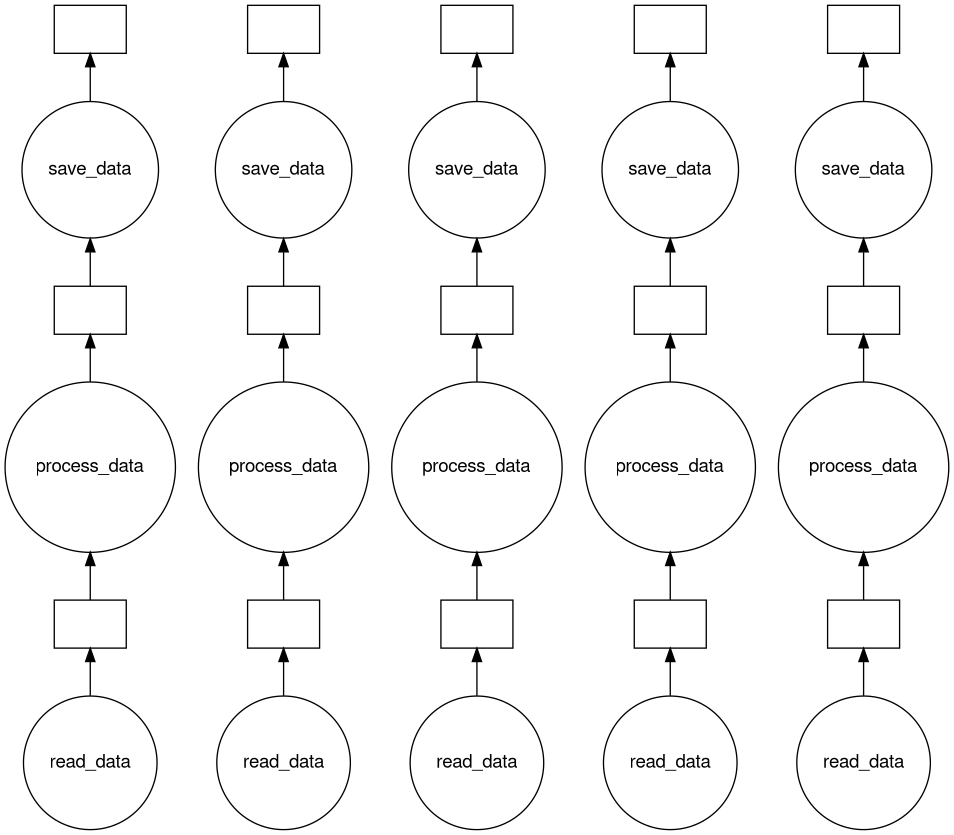

In [21]:
# Visualize the task graph
dask.visualize(*tasks, filename='task_graph', format='png')

<br>

----

5\. Dask Arrays
---------------



Dask Arrays provide a parallel, larger-than-memory array using blocked algorithms. They are designed to mimic NumPy arrays and support a subset of NumPy functionality.<br>
Dask Arrays are best used for numerical, multidimensional data and computations similar to those you'd perform with NumPy.<br>


-   **What it is**:\
    A `Dask Array` is a parallelized version of a NumPy array. It represents large, multi-dimensional arrays that are chunked into smaller blocks (or partitions) and distributed across multiple cores or machines for parallel computation.
-   **Why use it**:\
    It's useful when dealing with large datasets that don't fit into memory, as Dask splits the data into smaller chunks and operates on them in parallel, only loading what's necessary into memory.
-   **Common operations**:\
    Dask Arrays support many of the same operations as NumPy, including element-wise arithmetic, linear algebra operations, reshaping, and reductions (e.g., sum, mean).
    
<br>

----

### 5.1 Creating Dask Arrays

5.1.1.  **Import Dask Array and NumPy:**

-   **`dask.array as da`**: Alias for Dask's array module.
-   **`numpy as np`**: Alias for NumPy.
    

In [22]:
import dask.array as da
import numpy as np

5.1.2.  **Create a NumPy Array:**

-   **`np.random.random`**: Generates a large 2D NumPy array with random values.

In [23]:
x = np.random.random((10000, 10000))

5.1.3.  **Convert to a Dask Array:**

-   **`da.from_array()`**: Converts a NumPy array into a Dask array.
-   **`chunks=(1000, 1000)`**: Specifies the chunk size for partitioning the array.

In [24]:
darr = da.from_array(x, chunks=(1000, 1000))

5.1.4.  **Perform Computations:**

-   **`darr.mean()`**: Computes the mean of the Dask array.
-   **`result.compute()`**: Triggers the computation and returns the result.

In [25]:
result = darr.mean()
print(result.compute())

/usr/local/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 762.95 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


0.5000020506664686


**Explanation of Options and Variables:**

-   **`chunks`**: Defines the shape of each chunk (partition) in the Dask array. Smaller chunks allow for more parallelism but may introduce overhead.
-   **`from_array` Parameters:**
    -   **`x`**: Input NumPy array.
    -   **`name`**: Optional name for the Dask array.
    -   **`lock`**: Whether to use a lock when reading data; useful when dealing with shared resources.

**Why Use Dask Arrays?**

-   **Large Datasets**: Handle arrays that are larger than memory by chunking them into manageable pieces.
-   **Parallel Computations**: Utilize multiple cores or distributed resources for faster computations.
-   **Familiar Interface**: Provides an API similar to NumPy, reducing the learning curve.
  
<br>

---

### 5.2 Dask Array Operations

You can perform various operations on Dask arrays similar to NumPy arrays.

-   **Element-wise Operations**: Operations like addition, subtraction, and exponentiation are supported.
-   **Reductions**: Functions like `sum()`, `mean()`, `min()`, and `max()` aggregate data across axes.
-   **Linear Algebra**: Functions like `dot()` for matrix multiplication are available.

  **Example:**

In [26]:
# Element-wise operations
darr_squared = darr ** 2

# Reductions
sum_result = darr.sum().compute()
print("Sum:", sum_result)

/usr/local/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 762.95 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Sum: 50000205.06664686


In [27]:
# Linear algebra
matrix_product = da.dot(darr, darr.T)
print(matrix_product.compute())

/usr/local/lib/python3.9/site-packages/dask/array/routines.py:332: PerformanceWarning: Increasing number of chunks by factor of 10
  intermediate = blockwise(
/usr/local/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 763.01 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


[[3377.27469243 2512.71636214 2502.00271943 ... 2510.82232981
  2539.59791908 2509.07028527]
 [2512.71636214 3297.72440369 2483.56117854 ... 2493.37938563
  2523.8372382  2474.28729656]
 [2502.00271943 2483.56117854 3295.91537608 ... 2476.02398485
  2508.15416284 2474.94981739]
 ...
 [2510.82232981 2493.37938563 2476.02398485 ... 3325.57069213
  2523.46560578 2487.57706374]
 [2539.59791908 2523.8372382  2508.15416284 ... 2523.46560578
  3395.71116636 2519.09687128]
 [2509.07028527 2474.28729656 2474.94981739 ... 2487.57706374
  2519.09687128 3295.98121026]]


In [28]:
# Create a Dask array from a NumPy array
import numpy as np
x = np.random.random((10000, 10000))
darr = da.from_array(x, chunks=(1000, 1000))

# Perform computations
result = darr.mean()
print(result.compute())

/usr/local/lib/python3.9/site-packages/distributed/client.py:3362: UserWarning: Sending large graph of size 762.95 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


0.5000299412312318


#### Options and Parameters:

- **`from_array` Parameters:**
  - **`x`**: Input array.
  - **`chunks`**: Shape of the chunks.
  - **`name`**: Optional name for the array.
  - **`lock`**: Whether to lock the array during reading.

#### Why Use Dask Arrays?

- **Large Datasets**: Handle arrays that are larger than memory.
- **Parallel Computations**: Utilize multiple cores or distributed resources.
- **Familiar Interface**: Similar to NumPy's interface.

<br>

---

6\. Dask Bags
-------------

Dask Bags are designed for processing collections of Python objects that are not easily represented as arrays or DataFrames.<br> 
They are similar to PySpark's RDDs and most useful for semi-structured or unstructured data, such as JSON, log files, or large collections of items where you need custom processing.

-   **What it is**:\
    A `Dask Bag` is a parallelized version of Python lists or iterators, designed to work with unstructured or semi-structured data, such as JSON logs, text data, or other collections of items. It's particularly useful when working with irregular, non-tabular data.
-   **Why use it**:\
    Dask Bags are suited for parallelizing computations on data that don't easily fit into arrays or DataFrames, like logs, lists, or dictionaries. It operates on chunks of the data and processes them in parallel.
-   **Common operations**:\
    Dask Bags support operations like mapping functions, filtering, reductions, and transformations---similar to Python's `map()` and `filter()` functions, but in a parallel, distributed manner.

---

### 6.1 Creating Dask Bags

**Step-by-Step Explanation:**

6.1.1.  **Import Dask Bag:**

    -   **`dask.bag as db`**: Alias for Dask's bag module.

In [29]:
import dask.bag as db

6.1.2.  **Create a Dask Bag from a Sequence:**

    -   **`db.from_sequence()`**: Creates a Dask Bag from a Python sequence.
    -   **`npartitions=2`**: Number of partitions to divide the bag into.


In [30]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bag = db.from_sequence(data, npartitions=2)

6.1.3.  **Perform Map and Filter Operations:**

-   **`map()`**: Applies a function to each element.
-   **`filter()`**: Filters elements based on a predicate function.


In [31]:
mapped = bag.map(lambda x: x * x)
filtered = mapped.filter(lambda x: x > 10)

6.1.4.  **Collect Results:**

-   **`filtered.compute()`**: Triggers computation and returns the results as a list.



In [32]:
print(filtered.compute())

[16, 25, 36, 49, 64, 81, 100]


**Explanation of Options and Variables:**

-   **`npartitions`**: Number of partitions to divide the data into for parallel processing.
-   **`map()` Function**: Applies a function to each item in the bag.
-   **`filter()` Function**: Filters items based on a condition.

**Why Use Dask Bags?**

-   **Unstructured Data**: Ideal for data that doesn't fit neatly into arrays or DataFrames.
-   **Functional Operations**: Supports transformations like map, filter, groupby, and reductions.
-   **Parallelism**: Processes data in parallel across multiple partitions, speeding up computations.

---

7\. Dask Distributed Computing
------------------------------

Dask can distribute computations across multiple machines or cores, allowing you to scale your computations beyond a single machine.

**Why Use Dask Distributed?**

-   **Scalability**: Distribute computations across multiple machines or cores.
-   **Resource Management**: Control CPU and memory usage for efficient processing.
-   **Monitoring**: Access a dashboard for real-time monitoring and diagnostics.

* * * * *

### 7.1 Submitting Tasks to the Cluster

-   **`client.map()`**: Submits multiple tasks to the cluster.
-   **`client.gather()`**: Collects results from the futures.

**Explanation of Options and Variables:**

-   **`square` Function**: The function to apply to each item.
-   **`futures`**: A list of future objects representing the pending computations.
-   **`range(10)`**: The data to process, numbers from 0 to 9.

In [33]:
# Define a function
def square(x):
    return x ** 2

# Submit tasks
futures = client.map(square, range(10))
results = client.gather(futures)
print(results)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


---

## 8. Data Visualization with Dask

While Dask isn't designed for direct visualization, you can visualize task graphs and progress.

---

### 8.1 Visualizing Computation Graphs

-   **`da.random.random()`**: Generates a Dask array with random values.
-   **`chunks=(100, 100)`**: Specifies the chunk size.
-   **`result.visualize()`**: Creates a visualization of the computation graph.

This visualization helps understand how Dask breaks down computations.

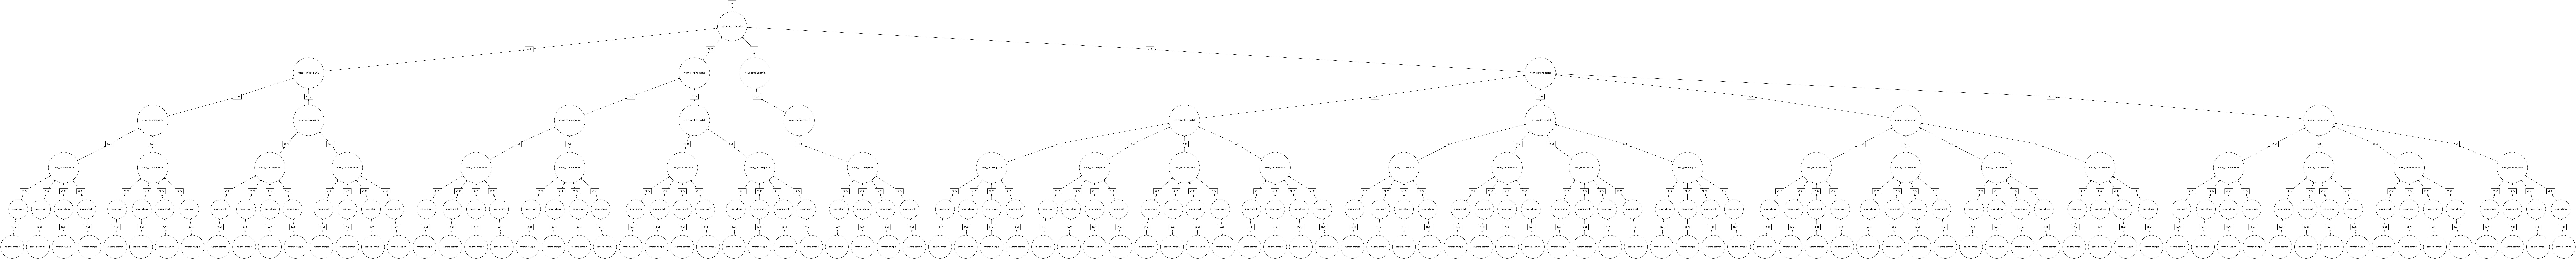

In [34]:
# Create a Dask array
darr = da.random.random((1000, 1000), chunks=(100, 100))

# Perform a computation
result = darr.mean()

# Visualize the computation graph
result.visualize(filename='array_mean', format='png')

---

9\. Integration with Other Libraries
------------------------------------

Dask integrates seamlessly with libraries like scikit-learn, XGBoost, and others, enabling scalable machine learning workflows.

---


### 9.1 Using Dask with scikit-learn

**Options and Variables:**

-   **`dask_ml.model_selection.train_test_split`**: is a Dask-based function that splits arrays or DataFrames into random train and test subsets, similar to sklearn.model_selection.train_test_split, but optimized for parallel processing on large datasets.
-   **`dask_ml.linear_model.LinearRegression`**: Dask's implementation of linear regression.
-   **`chunks=1000`**: Specifies chunk size for the Dask arrays.
-   **`test_size=0.2`**: Reserves 20% of the data for testing.

In [35]:
import dask.array as da
from sklearn.datasets import make_regression
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LinearRegression

# Generate synthetic data using sklearn
X_np, y_np = make_regression(n_samples=10000, n_features=20)

# Convert the NumPy arrays to Dask arrays
X = da.from_array(X_np, chunks=1000)
y = da.from_array(y_np, chunks=1000)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Compute the results
print(predictions.compute())

[ -80.96012021  -13.2977907    29.58609362 ... -226.13193665  -12.23943556
   91.48642494]


---
### 9.2 Using Dask with XGBoost

**Options and Variables:**

-   **`dd.read_csv('data.csv')`**: Reads a CSV file into a Dask DataFrame.
-   **`XGBRegressor`**: Dask-ML wrapper for XGBoost's regressor.
-   **`model.fit(X, y)`**: Trains the model on the data.
-   **`predictions.compute()`**: Computes the predictions.

**Why Use Dask with XGBoost?**

-   Leverages Dask's distributed computing capabilities with XGBoost's efficient algorithms.
-   Handles larger-than-memory datasets.

In [36]:
# Import necessary libraries
import dask.dataframe as dd
from dask.distributed import Client
from sklearn.preprocessing import LabelEncoder
from xgboost.dask import DaskXGBClassifier
from dask_ml.model_selection import train_test_split
from sklearn.metrics import classification_report
import dask.array as da
import dask
import pandas as pd

# Path to your full dataset
data_path = '/srv/notebooks/data/SoDSDL_dask.csv'  # Replace with your actual data path

# Load the dataset using Dask
df = dd.read_csv(
    '/srv/notebooks/data/SoDSDL_dask.csv',
    sep=',',  # Column separator
    header=0,  # Row number to use as the column names
    usecols=['Name', 'City', 'Age', 'Occupation', 'Target'],  # Updated columns to read
    dtype={
        'Name': 'object',
        'City': 'object',
        'Occupation': 'object',  # New column: Occupation
        'Age': 'int64',
        'Target': 'object'  # New column: Target
    },  # Data types for columns
    blocksize='64MB',  # Size of each partition
    sample=10000,  # Number of bytes to read for data type inference
    assume_missing=False,  # Assume no missing values in integer columns
    include_path_column=False  # Do not include a column with the file path
)

# List of categorical columns
categorical_cols = ['Name', 'City', 'Occupation']

# Convert categorical columns to numerical codes
def convert_to_numeric(df):
    for col in categorical_cols:
        df[col] = df[col].astype('category').cat.codes
    return df

df = df.map_partitions(convert_to_numeric)

# Handle missing values
# Check for missing values
missing_counts = df.isnull().sum().compute()
print("Missing values in each column:")
print(missing_counts)

# Fill missing values if necessary
# Example: Fill missing 'Age' with median age
if missing_counts['Age'] > 0:
    age_median = df['Age'].median().compute()
    df['Age'] = df['Age'].fillna(age_median)

# Encode the target variable
def encode_target(df):
    le = LabelEncoder()
    df['Target'] = le.fit_transform(df['Target'].astype(str))
    return df

df = df.map_partitions(encode_target)

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Recalculate class weights if necessary
# Compute class distribution in the training set
class_counts = y_train.value_counts().compute()
print("Training set class distribution:")
print(class_counts)

negative_count = class_counts.get(0, 0)
positive_count = class_counts.get(1, 0)

if positive_count > 0:
    scale_pos_weight = negative_count / positive_count
else:
    scale_pos_weight = 1  # Default to 1 if there's no positive class

# Create the model using XGBoost's Dask interface
model = DaskXGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    nthread=2
)
model.client = client

# Persist training data to optimize performance
X_train = X_train.persist()
y_train = y_train.persist()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Compute predictions and true labels
y_test_np, y_pred_np = dask.compute(y_test, predictions)

# Evaluate the model
print(classification_report(y_test_np, y_pred_np))

# Optionally, you can check feature importance
feature_importances = model.get_booster().get_score(importance_type='gain')

# Convert feature importances to a DataFrame for better visualization
feature_importances = pd.Series(feature_importances).sort_values(ascending=False)
print("Feature importances:")
print(feature_importances)


Missing values in each column:
Name          0
City          0
Occupation    0
Age           0
Target        0
dtype: int64
Training set class distribution:
Target
0    4
1    4
Name: count, dtype: int64


[12:53:04] Task [xgboost.dask-1]:tcp://127.0.0.1:35227 got rank 0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Feature importances:
Age    4.0
dtype: float64


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_clas

---
## 10. Conclusion

In this notebook, we explored Dask, covering:

- **Data Structures**: Dask Arrays, Bags, and Delayed.
- **Data Importing and Exporting**: Reading data from Splunk and other sources.
- **Dask Delayed and Task Graphs**: Building custom computation graphs.
- **Dask Distributed Computing**: Scaling computations across clusters.
- **Data Visualization**: Visualizing task graphs and monitoring with the dashboard.
- **Integration**: Combining Dask with other libraries like scikit-learn and XGBoost.


### Key Takeaways:

- **Parallelism**: Dask enables parallel computations on large datasets.
- **Scalability**: Scales from single machines to large clusters.
- **Flexibility**: Works with structured and unstructured data.
- **Integration**: Seamlessly integrates with the Python data ecosystem.

---

## Further Reading

- **Dask Documentation**: [https://docs.dask.org/en/latest/](https://docs.dask.org/en/latest/)
- **Dask Delayed**: [https://docs.dask.org/en/latest/delayed.html](https://docs.dask.org/en/latest/delayed.html)
- **Dask Array**: [https://docs.dask.org/en/latest/array.html](https://docs.dask.org/en/latest/array.html)
- **Dask Bag**: [https://docs.dask.org/en/latest/bag.html](https://docs.dask.org/en/latest/bag.html)
- **Dask Distributed**: [https://distributed.dask.org/en/latest/](https://distributed.dask.org/en/latest/)
- **Dask ML**: [https://ml.dask.org/](https://ml.dask.org/)

---

**Note**: Remember that Dask computations are lazy; you need to call `.compute()` or use a Dask client to execute them.

Feel free to explore further and leverage Dask for scalable data analytics!